In [126]:
from google.colab import files
files.upload()

MessageError: ignored

In [0]:
from sklearn.datasets import fetch_mldata
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
import keras.backend as k
from keras.utils.np_utils import to_categorical 
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
data_train = (train.drop(["label"], axis = 1).values).astype("float")
l_train = ((train["label"]).values).astype("float")

In [0]:
label_train = l_train

In [237]:
data_train = data_train.reshape(data_train.shape[0], 28, 28,1)
data_train.shape

(42000, 28, 28, 1)

In [0]:
#normalization
mean_px = data_train.mean().astype(np.float32)
std_px = data_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [0]:

l_train= to_categorical(l_train)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

gen = ImageDataGenerator()

In [0]:
from sklearn.model_selection import train_test_split
X = data_train
y = l_train
data_train, X_val, l_train, y_val = train_test_split(data_train, l_train, test_size=0.10, random_state=42)
batches = gen.flow(data_train, l_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [242]:
data_train.shape

(37800, 28, 28, 1)

In [0]:
from keras.layers.normalization import BatchNormalization

def get_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images ----> comment refrence: https://keras.io/preprocessing/image/

datagen.fit(data_train)

In [258]:
model = get_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n / 100, epochs=4, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/4
378/378 [==============================] - 300s 794ms/step - loss: 0.2019 - acc: 0.9490 - val_loss: 0.1092 - val_acc: 0.9753
Epoch 2/4
378/378 [==============================] - 302s 799ms/step - loss: 0.0816 - acc: 0.9761 - val_loss: 0.0554 - val_acc: 0.9852
Epoch 3/4
378/378 [==============================] - 298s 789ms/step - loss: 0.0599 - acc: 0.9828 - val_loss: 0.0486 - val_acc: 0.9843
Epoch 4/4
378/378 [==============================] - 288s 763ms/step - loss: 0.0396 - acc: 0.9884 - val_loss: 0.0658 - val_acc: 0.9838


In [0]:
test  = test.values.reshape(-1,28,28,1)

In [0]:
submission = model.predict_classes(test)
submission = np.argmax(submission, axis = 1)
submission = pd.Series(submission,name="Label")
#first column label and then id.
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)

from google.colab import files
submission.to_csv('filename.csv') 
files.download('filename.csv')

In [0]:
# from google.colab import files
# df.to_csv('filename.csv') 
# files.download('filename.csv')

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

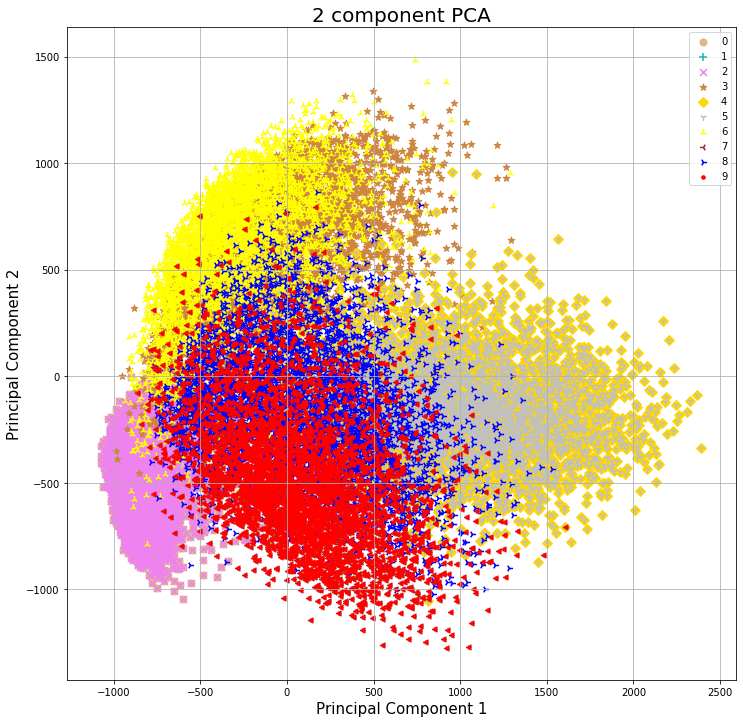

In [195]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
markers=["o","+","x","*","D","1","2","3","4","."]
targets = ['0','1', '2', '3','4','5','6','7','8','9']
colors = ['burlywood', 'lightseagreen', 'violet','peru','gold','silver','yellow','brown','blue','red']
for y, color, m in zip(label_train,colors,markers):
    indicesToKeep = train['label'] == y
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , marker = m
               , s = 50)
    
ax.legend(targets)
ax.grid()